# Elbow Method Demonstration

This notebook demonstrates how to use the elbow method to find the optimal number of clusters for k-means algorithm.

## Import Required Libraries

Import the necessary libraries including matplotlib, numpy, kneed, and scikit-learn.

In [1]:
# Import the required libraries.
import matplotlib.pyplot as plt
import numpy as np

from kneed import KneeLocator
from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs

## Generate Sample Data

Create synthetic blob data for clustering analysis.

In [2]:
# Set the seed for reproducibility.
np.random.seed(42)

# Generate sample data.
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

## Calculate Inertia for Different K Values

Use the elbow method to find the optimal number of clusters by calculating inertia.

In [3]:
# Elbow method to find the optimal number of clusters.
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

## Visualize Elbow Plot

Plot the elbow graph to identify the optimal number of clusters.

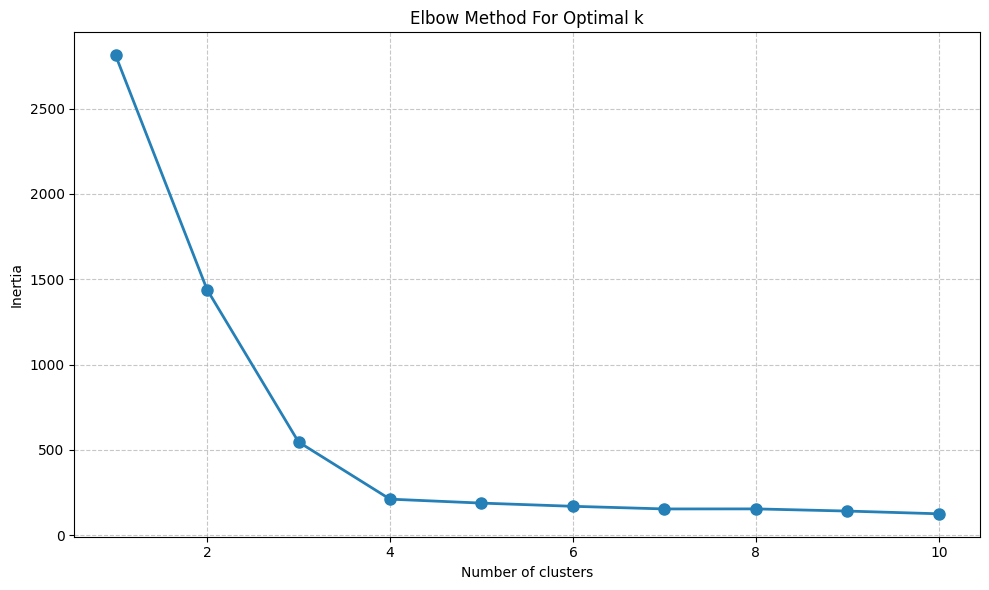

In [4]:
# Plot the elbow graph.
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, "o-", markersize=8, linewidth=2, color="#2580B7")

# Add labels to the plot.
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method For Optimal k")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

## Find Optimal K with KneeLocator

Use the KneeLocator library to automatically detect the elbow point.

In [5]:
# Define the colors to be used in the plot.
colors = [
    "#2580B7", # Blue
    "#179E86", # Dark Green
    "#9EBE5B", # Light Green
    "#F59B11", # Yellow
    "#C03B26", # Red
    "#633248", # Brown
    "#44546A", # Gray
]

# Use the KneeLocator from the kneed library to find the elbow point.
kl = KneeLocator(K, inertia, curve="convex", direction="decreasing")
elbow_point = kl.elbow
print(f"The optimal number of clusters is: {elbow_point}.")

The optimal number of clusters is: 4.


## Apply K-Means with Optimal K

Apply k-means clustering with the optimal number of clusters and visualize the results.

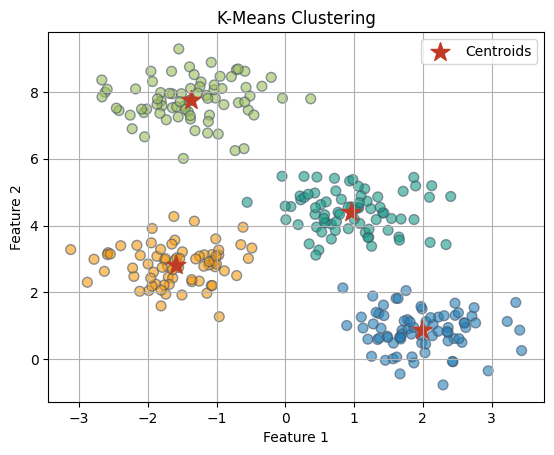

In [6]:
# Apply the k-means algorithm.
kmeans = KMeans(n_clusters=elbow_point, random_state=42)
kmeans.fit(X)

# Plot the data points and the centroids.
plt.scatter(
    X[:, 0], X[:, 1], c=[colors[int(label)] for label in kmeans.labels_],
    s=50, edgecolor=colors[-1], alpha=0.6
)
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c=colors[4], marker="*", label="Centroids"
)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()